In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
mat_content = sio.loadmat( 'face(1).mat' )

In [2]:
face_data = mat_content[ 'X' ]
face_id   = mat_content[ 'l' ]
print( face_data.shape )

type( face_id )

(2576, 520)


numpy.ndarray

### Splitting into Training and Test Sets
If the number of values belonging to each class are unbalanced, stratified sampling is a good thing, since it keeps the class proportions in the training and test sets from the whole dataset.

For this dataset, we have 520 images, but 52 faces. Each identity has 10 images, so we have balanced classes. As such, a purely random shuffle should give a fair test and train split.

From StackOverflow: Stratified Sampling Necessary?

In [3]:
#split training and test data use sklearn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split( face_data.T, test_size = 0.2, random_state = 42 )
train_set = train_set.T
test_set  = test_set.T

print( 'Train Set: {}, Percentage: {} %'.format( train_set.shape, 100*train_set.shape[1] / face_data.shape[ 1 ] ) )
print( 'Test  Set: {}, Percentage: {} %'.format( test_set.shape, 100*test_set.shape[1] / face_data.shape[ 1 ]) )

Train Set: (2576, 416), Percentage: 80.0 %
Test  Set: (2576, 104), Percentage: 20.0 %


### Applying PCA
We dont actually need class labels for PCA analysis, so we can use the train_set data set instead of the faceDataLabeled data set.

#### Calculate d-dimensional mean vector
We have 2576 dimensions, need to calculate the mean for each dimension to get the mean face.

In [4]:
train_set.shape

(2576, 416)

(2576,)


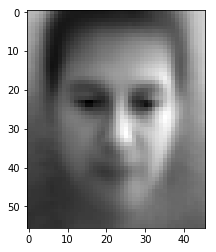

In [5]:
mean_face = np.mean( train_set, axis = 1) 
print(mean_face.shape)
mean_face_img = np.reshape(mean_face,(46,56))
plt.imshow( mean_face_img.T, cmap = 'gist_gray')

In [6]:
#subtract the mean face
phi_mat = train_set.astype( 'float64' )
print(phi_mat.shape)
for j in range(phi_mat.shape[1]):
    for i in range(phi_mat.shape[0]):
        phi_mat[i,j] = phi_mat[i,j] - mean_face[i]

(2576, 416)


In [7]:
A = phi_mat
print(A.shape)
#covirance matrix S
S = 1/A.shape[1] * np.dot(A,A.T)

(2576, 416)


In [8]:
eig_val, eig_vec = np.linalg.eig( S )

In [9]:
eig_vec[ 0 ].shape

(2576,)

In [10]:
eig_pairs = [ ( np.abs( eig_val[ i ] ), eig_vec[ :, i ] ) for i in range( len( eig_val ) ) ]
eig_pairs.sort( key = lambda x: x[ 0 ], reverse = True )

for i in range(10):
    print( eig_pairs[ i ][0] )

925024.7089041442
532530.6315193954
448877.8466168924
263240.39129072166
223404.15014935445
141717.61246414387
132692.99285091058
116053.13020208251
99239.42387783811
81012.5869877316


In [11]:
#M largerst eigen pairs
M_eig_pairs = []
for i in eig_pairs:
    if( i[ 0 ] > 1 ):
        M_eig_pairs.append( i )
print( 'Original Eig_Pairs: {}'.format( len( eig_pairs ) ) )
print( 'Reduced Eig_Pairs: {}'.format( len( M_eig_pairs ) ) )

Original Eig_Pairs: 2576
Reduced Eig_Pairs: 415


In [12]:
M_eig_pairs[ 0 ][ 1 ]

# eig_face_img = eig_face.reshape( 46, 56 )
# plt.imshow( eig_face_img.T, cmap = 'gist_gray' )

array([ 0.01326336+0.j,  0.014329  +0.j,  0.0149903 +0.j, ...,
       -0.00311901+0.j, -0.00294199+0.j, -0.00324892+0.j])

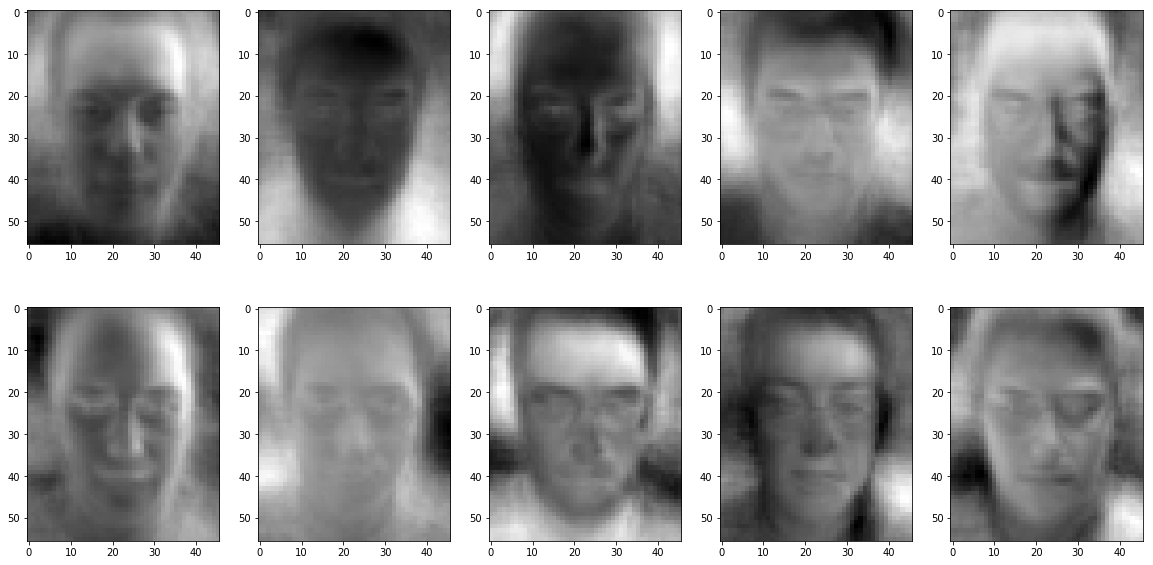

In [13]:
fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    eigen_vector      = M_eig_pairs[ i ][ 1 ]
    eigen_vector_real = eigen_vector.real
    eigen_face_img    = np.reshape( eigen_vector_real, ( 46, 56 ) )
    
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( eigen_face_img.T, cmap = 'gist_gray' )
    
plt.show()
fig.savefig("Q1HD.png")

# LOW DIMENSION PCA

In [14]:
#covirance matrix S
S_LD = 1/A.shape[1] * np.matmul(A.T,A)
LD_EigVal, LD_EigVec = np.linalg.eig( S_LD )

In [15]:
LD_eig_pairs = [ (np.abs( LD_EigVal[ i ] ), LD_EigVec[ :, i ] ) for i in range( len( LD_EigVal ) ) ]
LD_eig_pairs.sort( key = lambda x: x[ 0 ], reverse = True )

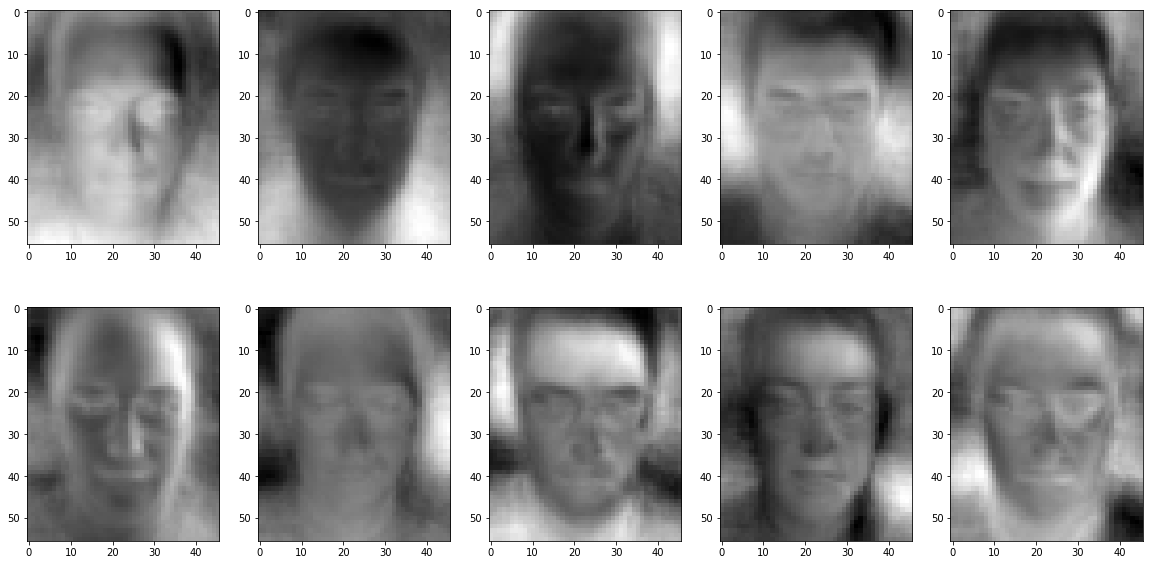

In [16]:
fig = plt.figure( figsize = ( 20, 10 ) )
for i in range( 10 ):
    eigen_vector      = LD_eig_pairs[ i ][ 1 ]
    eigen_vector_real = eigen_vector.real
    norm = np.linalg.norm( eigen_vector_real )
    eigen_face = eigen_vector_real / norm
    eigen_face_img  = np.reshape(np.dot(A,eigen_face), ( 46, 56 ) )
#     print( eigen_face / norm )
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( eigen_face_img.T, cmap = 'gist_gray' )
plt.show()
fig.savefig("Q1LD.png")

In [17]:
np.dot( A, LD_eig_pairs[ 0 ][ 0 ] )

array([[-7.46468257e+06,  1.05388332e+08,  1.10938480e+08, ...,
        -2.31901026e+07, -4.68960844e+06,  9.15129613e+07],
       [ 5.30332676e+06,  1.14456242e+08,  9.96558471e+07, ...,
        -2.05973651e+07, -3.02189562e+06,  6.54299328e+07],
       [ 1.84226676e+07,  1.13700213e+08,  7.85492737e+07, ...,
        -1.85783208e+07, -4.70295014e+06,  9.17242049e+06],
       ...,
       [-3.45372206e+07,  5.33401267e+07, -4.28624430e+07, ...,
        -3.26871712e+07, -3.63872700e+07, -5.95128878e+07],
       [-3.18644329e+07,  5.50878898e+07, -4.01896553e+07, ...,
        -3.00143835e+07, -3.92646306e+07, -5.77651247e+07],
       [-3.13240939e+07,  4.73030063e+07, -4.05743410e+07, ...,
        -3.22491186e+07, -3.40991681e+07, -6.09248846e+07]])

In [18]:
LD_eig_pairs[ 0 ][ 1 ][ 0 ]

-0.007448731482530153

In [19]:
lst = []
ld_eig_vecs_sign = []

for i in range( len( LD_eig_pairs ) - 1 ):
    lst.append( np.dot(A, LD_eig_pairs[ i ][ 1 ] ) )

for i in range( len( lst ) - 1 ):
    if( M_eig_pairs[ i ][ 1 ][ 0 ] < 0 and lst[ i ][ 0 ] > 0 ):
        ld_eig_vecs_sign.append( -1*lst[ i ] ) 
    elif( M_eig_pairs[ i ][ 1 ][ 0 ] > 0 and lst[ i ][ 0 ] < 0):
        ld_eig_vecs_sign.append( -1*lst[ i ] )
    else:
        ld_eig_vecs_sign.append( lst[ i ] )
        
ld_eig_vecs_sign

[array([260.18180359, 281.085983  , 294.05838133, ..., -61.18430193,
        -57.71180548, -63.73269401]),
 array([-151.87925055, -134.64124384, -100.68439588, ...,  693.50534556,
         691.54476196,  698.37060837]),
 array([ 283.27280886,  306.854785  ,  344.36870762, ..., -176.11124227,
        -177.60177353, -208.36893869]),
 array([  38.18372709,    0.38847895,  -21.59887938, ..., -310.39058654,
        -362.37806379, -372.91719328]),
 array([-29.41204294, -18.23813815, -32.90581723, ...,  24.17134287,
         11.35617954,  -6.15526292]),
 array([-234.59432768, -271.54592275, -297.81159321, ...,   74.34749662,
          86.04221398,  112.69146938]),
 array([291.82707657, 320.90449068, 342.25577953, ...,   7.95885478,
        -24.87509794, -40.1299154 ]),
 array([ -72.63962938,  -94.45800646, -121.59697718, ...,   95.03903732,
         128.8149408 ,  139.35050019]),
 array([ 90.36946644,  99.9320065 , 113.61044066, ..., 207.39427043,
        159.70895441, 123.20773831]),
 array(

In [20]:
ld_eig_vecs_sign[ 0 ]

norm = np.linalg.norm( ld_eig_vecs_sign[ 0 ] )

normalized = ld_eig_vecs_sign[ 0 ] / norm

normalized.shape

(2576,)

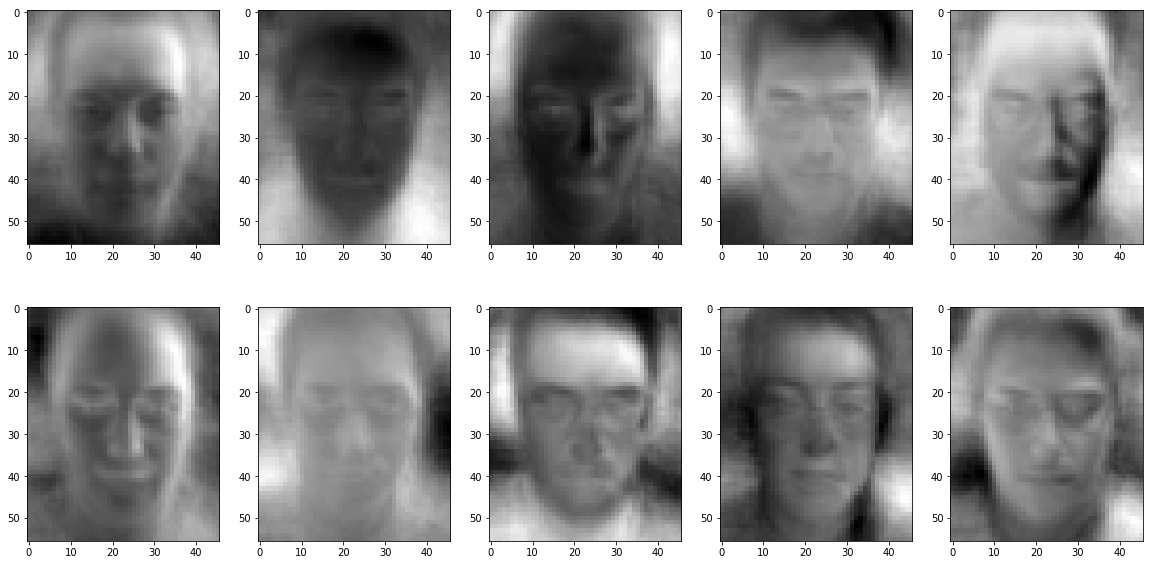

In [21]:
fig = plt.figure( figsize = ( 20, 10 ) )
for i in range( 10 ):
    eigen_vector      = ld_eig_vecs_sign[ i ]
    eigen_vector_real = eigen_vector.real
    norm = np.linalg.norm( eigen_vector_real )
    eigen_face = eigen_vector_real / norm
    eigen_face_img  = np.reshape( eigen_face, ( 46, 56 ) )
#     print( eigen_face / norm )
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( eigen_face_img.T, cmap = 'gist_gray' )
plt.show()
fig.savefig("Q1LDSign.png")

___
# Question2
recontruction of the face using low-dimensional PCA, varing the number of M 

In [22]:
ld_eig_vecs_sign

[array([260.18180359, 281.085983  , 294.05838133, ..., -61.18430193,
        -57.71180548, -63.73269401]),
 array([-151.87925055, -134.64124384, -100.68439588, ...,  693.50534556,
         691.54476196,  698.37060837]),
 array([ 283.27280886,  306.854785  ,  344.36870762, ..., -176.11124227,
        -177.60177353, -208.36893869]),
 array([  38.18372709,    0.38847895,  -21.59887938, ..., -310.39058654,
        -362.37806379, -372.91719328]),
 array([-29.41204294, -18.23813815, -32.90581723, ...,  24.17134287,
         11.35617954,  -6.15526292]),
 array([-234.59432768, -271.54592275, -297.81159321, ...,   74.34749662,
          86.04221398,  112.69146938]),
 array([291.82707657, 320.90449068, 342.25577953, ...,   7.95885478,
        -24.87509794, -40.1299154 ]),
 array([ -72.63962938,  -94.45800646, -121.59697718, ...,   95.03903732,
         128.8149408 ,  139.35050019]),
 array([ 90.36946644,  99.9320065 , 113.61044066, ..., 207.39427043,
        159.70895441, 123.20773831]),
 array(

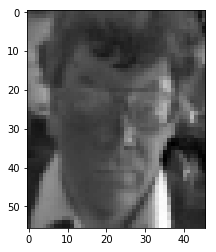

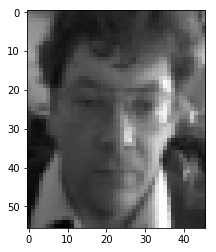

In [59]:
#number of face
N_Face = 1
phi = A[  : , N_Face-1 ]

phi.shape

plt.figure( 1 )
plt.imshow( phi.reshape( 46, 56 ).T, cmap = 'gist_gray' )
plt.show()

plt.figure(2)
plt.imshow( train_set[ :, N_Face-1 ].reshape( 46, 56 ).T, cmap = 'gist_gray' )
plt.show()

In [24]:
#Choose M largest Eigenface
M = 10
pca_base = np.array( [ ld_eig_vecs_sign[ i ] / np.linalg.norm( ld_eig_vecs_sign[ i ] ) for i in range( M ) ] )
# pca_base = np.array( [ M_eig_pairs[i][1] for i in range( M ) ] )
print(pca_base.shape)


phi = phi.reshape( 2576, 1 )
print(phi.T.shape)

face_projection = np.dot( phi.T, pca_base.T )
print(face_projection.shape)

(10, 2576)
(1, 2576)
(1, 10)


### Image reconstruction

[[130.6920433  128.39852343 127.35446984 ...  84.31157192  87.67315039
   90.38947135]]


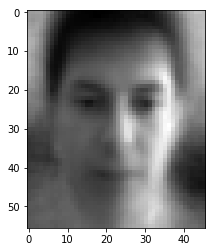

In [25]:
face_reconstructed = mean_face + np.dot( face_projection, pca_base )
print(face_reconstructed.real)
face_reconstructed = face_reconstructed.real
face = face_reconstructed.reshape( 46, 56)
plt.imshow( face.T, cmap = 'gist_gray' )

# Reconstruction Error Varying PCA Base



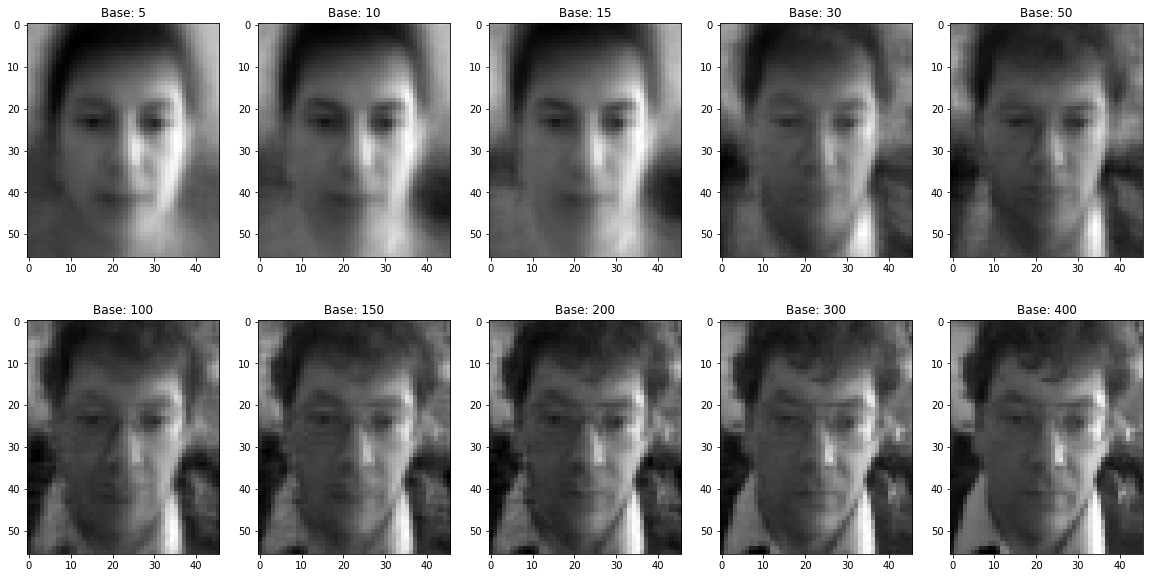

In [45]:
from scipy.spatial.distance import euclidean

M = 10
bases = [ 5, 10, 15, 30, 50, 100, 150, 200, 300, 400 ]

phi = phi.reshape( 2576, 1 )

euclidean_error = []

fig = plt.figure( figsize = ( 20, 10 ) )

count = 0

for base in bases:
    pca_base = np.array( [ ld_eig_vecs_sign[ i ] / np.linalg.norm( ld_eig_vecs_sign[ i ] ) for i in range( base ) ] )

    face_projection = np.dot( phi.T, pca_base.T )
    
    face_reconstructed = mean_face + np.dot( face_projection, pca_base )
    
    error = euclidean( phi, face_reconstructed )
    
    euclidean_error.append( error )
    
    img = np.reshape( face_reconstructed.real, ( 46, 56 ) )
    
    a = fig.add_subplot( 2, 5, count + 1 )
    count += 1
    a.set_title( 'Base: {}'.format(base))
    plt.imshow( img.T, cmap = 'gist_gray' )

Text(0,0.5,'Reconstruction Error (Euclidean Distance)')

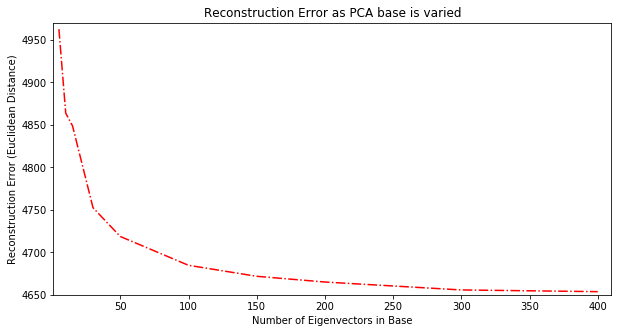

In [49]:
reconstruction_error_fig = plt.figure( figsize = ( 10, 5 ) )

plt.plot( bases, euclidean_error, 'r-.')
plt.axis([1, 410, 4650, 4970])
plt.title('Reconstruction Error as PCA base is varied')
plt.xlabel('Number of Eigenvectors in Base')
plt.ylabel('Reconstruction Error (Euclidean Distance)')

# NN Classification


In [30]:
face_data_labels = mat_content[ 'l' ]
print( 'Face Data Shape: {}'.format( face_data.shape ) )
print( 'Face Data Labels Shape: {}'.format( face_data_labels.shape ) )

faceDataLabeled = np.vstack( ( face_data, face_data_labels ) )
# print(faceDataLabeled)
print( 'Face Data Labeled Shape: {}'.format( faceDataLabeled.shape ) )

Face Data Shape: (2576, 520)
Face Data Labels Shape: (1, 520)
[[106 130 191 ...  70 183  77]
 [103 129 185 ...  62 250  72]
 [103 130 174 ...  83 163  68]
 ...
 [ 36  36  19 ...  89  95 103]
 [ 41  35  17 ...  94 106 110]
 [  1   1   1 ...  52  52  52]]
Face Data Labeled Shape: (2577, 520)


In [27]:
train_label, test_label = train_test_split( faceDataLabeled, test_size = 0.2, random_state = 69 )

train_label.T.shape

(520, 2061)